
# HomeWork 10

**DeadLine : 23;59 12 Azar 1398**

**Total points : 100pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [3]:
from scipy.spatial import distance as dist

def detect_shape(contour):
    shape = "unidentified"
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * perimeter, True)
    
    if len(approx) == 3:
        shape = 'triangle'
        
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ratio = w / float(h)
        
        if ratio >= 0.95 and ratio <= 1.05:
            shape = 'square'
        else:
            shape = 'rectangle'
        
    elif len(approx) == 5:
        shape = 'pentagon'
            
    else:
        shape = 'circle'
        
    return shape

def detect_color(image, contour):
    
    colors = np.array([
        [[255, 0, 0]],
        [[0, 255, 0]],
        [[0, 0, 255]],
    ], dtype="uint8")
    
    color_names = ['red', 'green', 'blue']
    
    lab = cv2.cvtColor(colors, cv2.COLOR_RGB2LAB)
        
    mask = mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mask = cv2.erode(mask, None, iterations=1)
        
    mean = cv2.mean(image, mask=mask)[:3]
    
    min_dist = (np.inf, None)
    
    for (i, row) in enumerate(lab):
        
        d = dist.euclidean(row[0], mean)
        
        if d < min_dist[0]:
            min_dist = (d, i)
            
    return color_names[min_dist[1]]

Implement this function to detect shapes and their colors in an input image.

In [4]:
def detect_shape_color(image):
    '''
    Detects shapes and their color in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    

    for contour in contours:
        if cv2.contourArea(contour) > 0:

            M = cv2.moments(contour)

            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

            shape = detect_shape(contour)

            color = detect_color(image, contour)

            text = color + " " + shape
            cv2.putText(image, text, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return image

Test your implementation (don't change this cell).

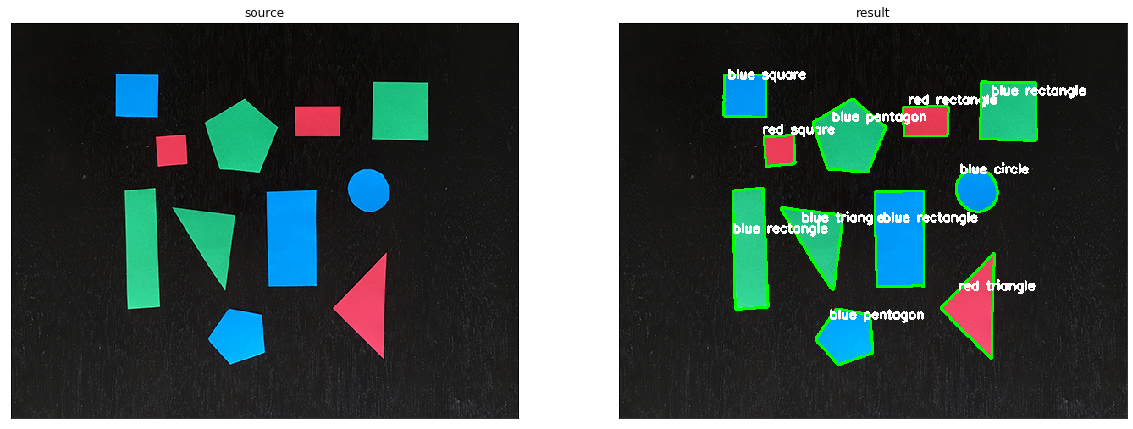

In [5]:
image_list = []
image = cv2.imread(os.path.join('images', 'q3.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([cv2.cvtColor(detect_shape_color(image), cv2.COLOR_BGR2RGB), 'result', 'img'])
plotter(image_list, 1, 2, False, 20, 10, 'Q3')

# PART 4

**Point : 40 pts**

Here is for your helper functions(optional).

In [6]:
def make_slice(image, offset, i, j):
    return image[i - offset : i + offset + 1, j - offset : j + offset + 1]

def get_indices(shape, offset):
    indices = []
    for val in range(shape):
        if val - offset >= 0 and val + offset + 1 < shape:
            indices.append(val)
    return indices

Please, set your structuring element here:

In [7]:
structuring_element = np.ones((25, 25))

Implement this function to dilate the input image with a square element without using the OpenCV methods.

In [8]:
def your_dilate(image, structuring_element):
    '''
    Applies your dilation.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    
    offset = structuring_element.shape[0] // 2
    
    rows = get_indices(image.shape[0], offset)
    cols = get_indices(image.shape[1], offset)
    
    dilated_image = np.zeros_like(image)
    
    for i in rows:
        for j in cols:
            image_slice = make_slice(image, offset, i, j)
            if np.logical_and(structuring_element, image_slice).any():
                dilated_image[i, j] = 1

    return dilated_image

Implement this function to erode the input image with a square element without using the OpenCV methods.

In [9]:
def your_erode(image, structuring_element):
    '''
    Applies your erosion.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    offset = structuring_element.shape[0] // 2
    
    rows = get_indices(image.shape[0], offset)
    cols = get_indices(image.shape[1], offset)
    
    eroded_image = np.zeros_like(image)
    
    for i in rows:
        for j in cols:
            image_slice = make_slice(image, offset, i, j)
            logical_and = np.logical_and(structuring_element, image_slice)

            if np.array_equal(logical_and, structuring_element):
                eroded_image[i, j] = 1
                        
    return eroded_image

Implement this function to dilate the input image with a square element using the OpenCV methods.

In [10]:
def cv_dilate(image, structuring_element):
    '''
    Applies OpenCV dilation.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    return cv2.dilate(image, structuring_element, iterations=1)  

Implement this function to erode the input image with a square element using the OpenCV methods.

In [11]:
def cv_erode(image, structuring_element):
    '''
    Applys OpenCV erosion.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    return cv2.erode(image, structuring_element, iterations=1)  

Test your implementation (don't change this cell).

time for your_dilate: 12.566123 s
time for cv_dilate: 0.002072 s
time for your_erode: 22.177323 s
time for cv_erode: 0.002230 s


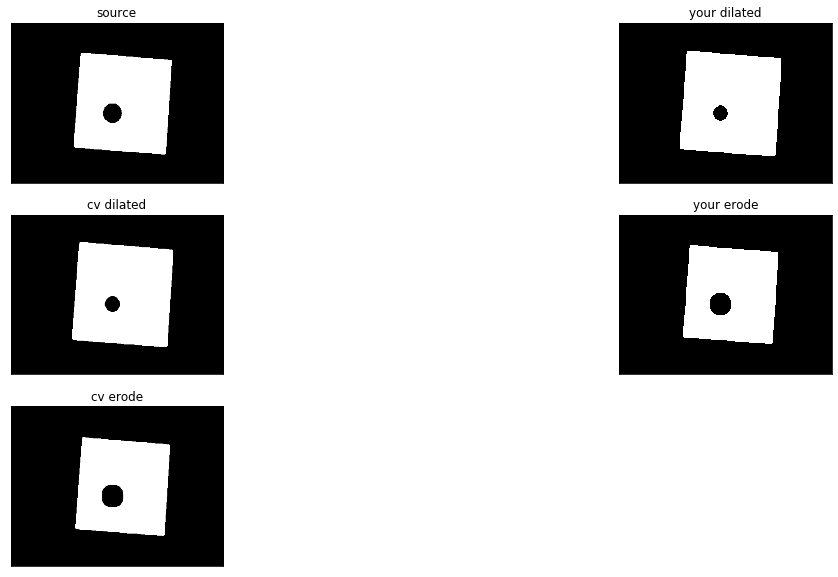

In [12]:
image_list = []
image = cv2.imread(os.path.join('images', 'q4.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
t1 = time.time()
y_dilate = your_dilate(image, structuring_element)
t2 = time.time()
print('time for your_dilate: %f s' % (t2 - t1))
t1 = time.time()
c_dilate = cv_dilate(image, structuring_element)
t2 = time.time()
print('time for cv_dilate: %f s' % (t2 - t1))
t1 = time.time()
y_erode = your_erode(image, structuring_element)
t2 = time.time()
print('time for your_erode: %f s' % (t2 - t1))
t1 = time.time()
c_erode = cv_erode(image, structuring_element)
t2 = time.time()
print('time for cv_erode: %f s' % (t2 - t1))
image_list.append([y_dilate, 'your dilated', 'img'])
image_list.append([c_dilate, 'cv dilated', 'img'])
image_list.append([y_erode, 'your erode', 'img'])
image_list.append([c_erode, 'cv erode', 'img'])
plotter(image_list, 3, 2, True, 20, 10, 'Q4')

To create proper files for sending in the Quera run this cell, please.

In [13]:
!python notebook_converter.py

End!!!